In [ ]:
%pip install tensorflow

In [7]:
import tensorflow

data = tensorflow.keras.utils.image_dataset_from_directory("cats_vs_dogs", shuffle = False, batch_size= None)
data

Found 2000 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

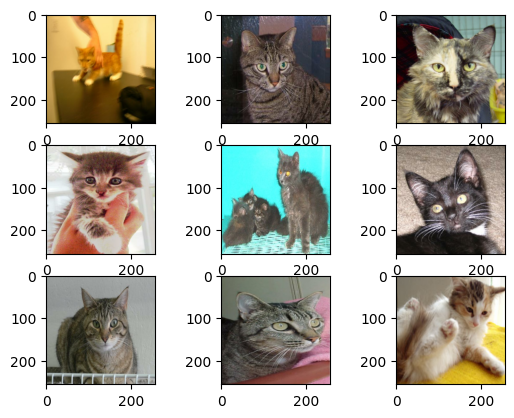

In [8]:
import matplotlib.pyplot as plt

images = data.take(9)

plt.figure() # Create a canvas
for i , (image, label) in enumerate(images):
    plt.subplot(3, 3, i + 1) # Plotting the i + 1 image in a 3 x  canvas
    plt.imshow(image.numpy().astype("uint8"))

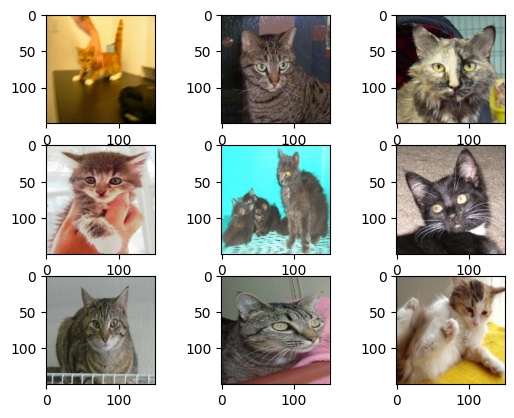

In [9]:
images = data.take(9)

resize = tensorflow.keras.layers.Resizing(150, 150)
images = images.map(lambda x, y: (resize(x), y))

plt.figure()
for i , (image, label) in enumerate(images):
    plt.subplot(3, 3, i + 1) # Plotting the i + 1 image in a 3 x  canvas
    plt.imshow(image.numpy().astype("uint8"))

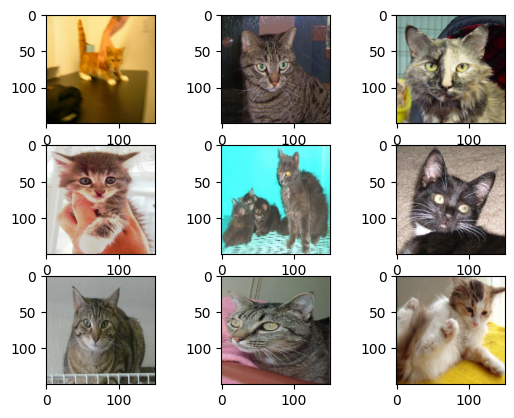

In [10]:
images = data.take(9)

resize = tensorflow.keras.layers.Resizing(150, 150)
images = images.map(lambda x, y: (resize(x), y))

flip = tensorflow.keras.layers.RandomFlip("horizontal")
images = images.map(lambda x, y: (flip(x), y))

plt.figure()
for i, (image, label) in enumerate(images):
    plt.subplot(3, 3, i + 1) # Plotting the i+1 image in a 3x3 canvas
    plt.imshow(image.numpy().astype("uint8"))


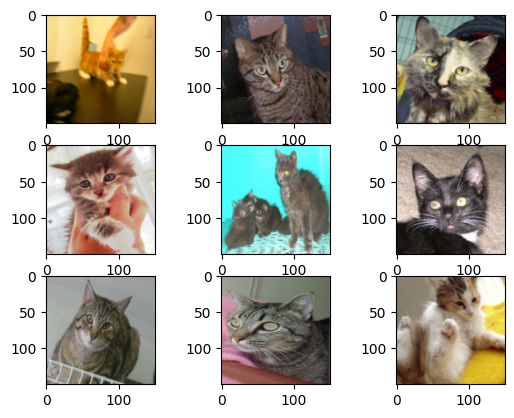

In [11]:
images = data.take(9)

resize = tensorflow.keras.layers.Resizing(150, 150)
images = images.map(lambda x, y: (resize(x), y))

flip = tensorflow.keras.layers.RandomFlip("horizontal")
images = images.map(lambda x, y: (flip(x), y))

rotate = tensorflow.keras.layers.RandomRotation(0.1)
images = images.map(lambda x, y: (rotate(x), y))

plt.figure() # Create a canvas
for i, (image, label) in enumerate(images):
    plt.subplot(3, 3, i + 1) # Plotting the i+1 image in a 3x3 canvas
    plt.imshow(image.numpy().astype("uint8"))

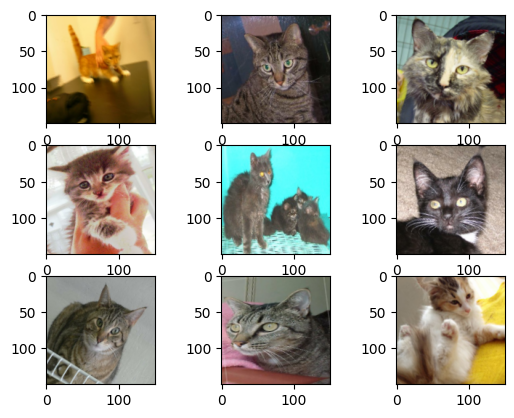

In [12]:
augmentation_layers = [
    tensorflow.keras.layers.Resizing(150, 150),
    tensorflow.keras.layers.RandomFlip("horizontal"),
    tensorflow.keras.layers.RandomRotation(0.1),
]

def augment(x):
    for layer in augmentation_layers:
        x = layer(x)
    return x

images = data.take(9)
images = images.map(lambda x, y: (augment(x), y))

plt.figure() # Create a canvas
for i, (image, label) in enumerate(images):
    plt.subplot(3, 3, i + 1) # Plotting the i+1 image in a 3x3 canvas
    plt.imshow(image.numpy().astype("uint8")) # Convert from float to int